# Assignment 4: Morphology in image processing

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
from PIL import Image
import cv2
from skimage.morphology import square, diamond
from skimage.filters import threshold_otsu
from scipy.ndimage import binary_fill_holes
from matplotlib.gridspec import GridSpec

### 1. Morphology 
##### 1.1. Structuring element 
##### The function to define a structuring element is strel in Matlab and you can achieve the same functionality using skimage.morphology or cv2 (OpenCV) in Python. Try to define the classic V4 and V8.

In [6]:
#V4 Structuring Element (4-connectivity)
struct_el_v4 = diamond(1)  #Generates a diamond-shaped structuring element for 4-connectivity
print("V4 Structuring Element:\n", struct_el_v4)

#V8 Structuring Element (8-connectivity)
struct_el_v8 = square(3)  #Generates a square structuring element for 8-connectivity
print("V8 Structuring Element:\n", struct_el_v8)

V4 Structuring Element:
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
V8 Structuring Element:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


In [7]:
#Option 2 with cv2
struct_el2_v4 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
print("V4 Structuring Element:\n", struct_el2_v4)

# V8 Structuring Element (8-connectivity)
struct_el2_v8 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
print("V8 Structuring Element:\n", struct_el2_v8)

V4 Structuring Element:
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
V8 Structuring Element:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


##### 1.2. Erosion/dilation 
##### The functions to used are erosion and dilation, after having chosen the structuring element as before. Apply these functions to ‘shapes’. Remember to work on a binary image obtained after thresholding. Is it possible to obtain some settings in order to obtain two different images, where it becomes possible to count (visually first) the diagonal and circular objects? Is it always possible with ‘shapes2’? 

In [8]:
#Load the image shapes
image_shapes = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 4 - IP\\IP4_v2 1\\IP4_v2\\shapes.png")
#To array
image_array_shapes = np.array(image_shapes)

#Function for Otsu thresholding
def otsu_method(img):
    otsu_threshold = threshold_otsu(img)
    #Binarization
    binary_image = (img > otsu_threshold).astype(np.uint8)
    return binary_image, otsu_threshold

#Binarization
binary_image_shapes, otsu_threshold_shapes = otsu_method(image_array_shapes)

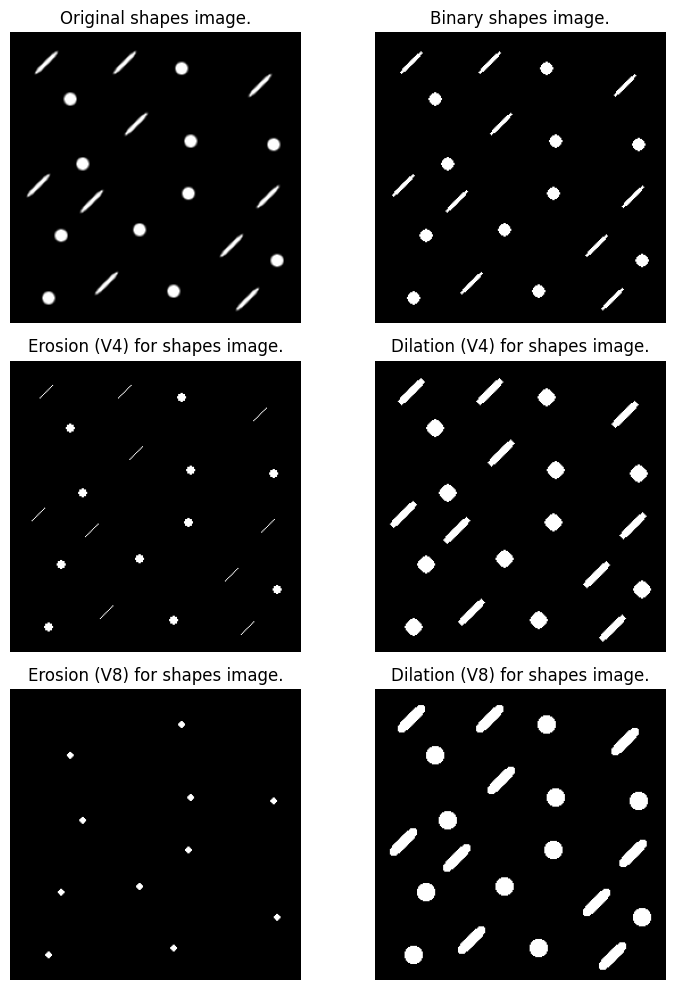

In [9]:
#Erosion and Dilation for image shapes through the kernels found in point 1.1 with cv2.
#Through V4 structuring element
eroded_v4_shapes = cv2.erode(binary_image_shapes, struct_el2_v4, iterations=2)
dilated_v4_shapes = cv2.dilate(binary_image_shapes, struct_el2_v4, iterations=2)

#Through V8 structuring element
eroded_v8_shapes = cv2.erode(binary_image_shapes, struct_el2_v8, iterations=2)
dilated_v8_shapes = cv2.dilate(binary_image_shapes, struct_el2_v8, iterations=2)

#Plot results
fig, ax = plt.subplots(3, 2, figsize=(8, 10))
ax[0, 0].imshow(image_shapes, cmap='gray', norm=NoNorm())
ax[0, 0].set_title("Original shapes image.")
ax[0, 0].axis('off')

ax[0, 1].imshow(binary_image_shapes, cmap='gray')
ax[0, 1].set_title("Binary shapes image.")
ax[0, 1].axis('off')

ax[1, 0].imshow(eroded_v4_shapes, cmap='gray')
ax[1, 0].set_title("Erosion (V4) for shapes image.")
ax[1, 0].axis('off')

ax[1, 1].imshow(dilated_v4_shapes, cmap='gray')
ax[1, 1].set_title("Dilation (V4) for shapes image.")
ax[1, 1].axis('off')

ax[2, 0].imshow(eroded_v8_shapes, cmap='gray')
ax[2, 0].set_title("Erosion (V8) for shapes image.")
ax[2, 0].axis('off')

ax[2, 1].imshow(dilated_v8_shapes, cmap='gray')
ax[2, 1].set_title("Dilation (V8) for shapes image.")
ax[2, 1].axis('off')

plt.tight_layout()
plt.show()


In [10]:
#Load the image shapes2
image_shapes2 = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 4 - IP\\IP4_v2 1\\IP4_v2\\shapes2.png")
#To array
image_array_shapes2 = np.array(image_shapes2)

#Binarization
binary_image_shapes2, otsu_threshold_shapes2 = otsu_method(image_array_shapes2)

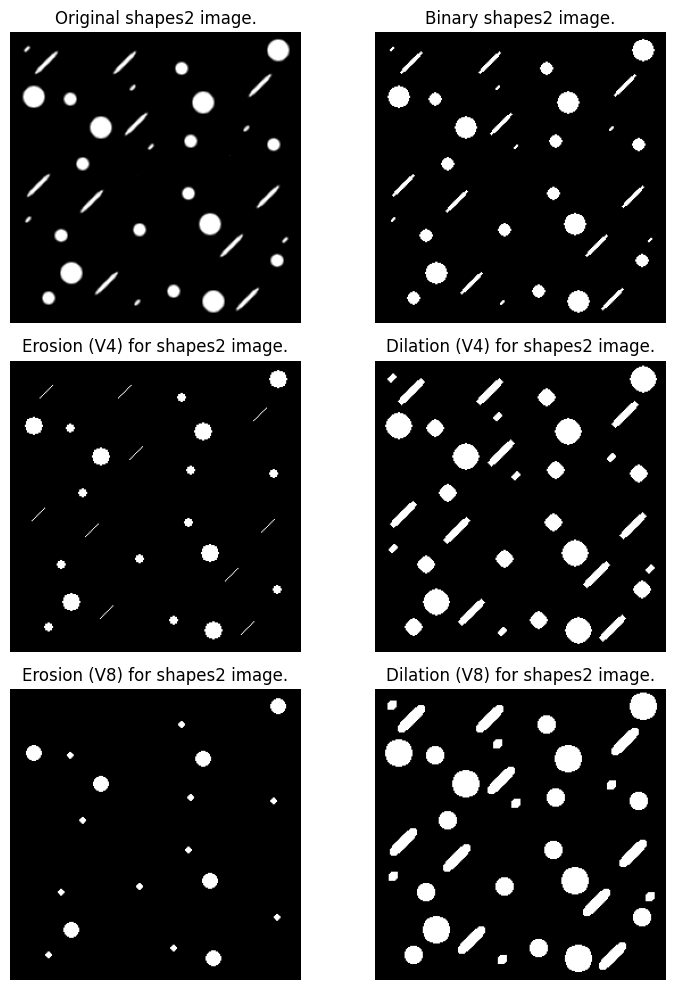

In [11]:
#Erosion and Dilation for image shapes through the kernels found in point 1.1 with cv2.
#Through V4 structuring element
eroded_v4_shapes2 = cv2.erode(binary_image_shapes2, struct_el2_v4, iterations=2)
dilated_v4_shapes2 = cv2.dilate(binary_image_shapes2, struct_el2_v4, iterations=2)

#Through V8 structuring element
eroded_v8_shapes2 = cv2.erode(binary_image_shapes2, struct_el2_v8, iterations=2)
dilated_v8_shapes2 = cv2.dilate(binary_image_shapes2, struct_el2_v8, iterations=2)

#Plot results
fig, ax = plt.subplots(3, 2, figsize=(8, 10))
ax[0, 0].imshow(image_shapes2, cmap='gray', norm=NoNorm())
ax[0, 0].set_title("Original shapes2 image.")
ax[0, 0].axis('off')

ax[0, 1].imshow(binary_image_shapes2, cmap='gray')
ax[0, 1].set_title("Binary shapes2 image.")
ax[0, 1].axis('off')

ax[1, 0].imshow(eroded_v4_shapes2, cmap='gray')
ax[1, 0].set_title("Erosion (V4) for shapes2 image.")
ax[1, 0].axis('off')

ax[1, 1].imshow(dilated_v4_shapes2, cmap='gray')
ax[1, 1].set_title("Dilation (V4) for shapes2 image.")
ax[1, 1].axis('off')

ax[2, 0].imshow(eroded_v8_shapes2, cmap='gray')
ax[2, 0].set_title("Erosion (V8) for shapes2 image.")
ax[2, 0].axis('off')

ax[2, 1].imshow(dilated_v8_shapes2, cmap='gray')
ax[2, 1].set_title("Dilation (V8) for shapes2 image.")
ax[2, 1].axis('off')

plt.tight_layout()
plt.show()


##### 1.3. Closing/Opening 
##### The functions to used are closing and opening. Try to treat the image ‘eng’ in order to be able to count (visually first) the number of exterior teeth? How binary_fill_holes could be used to improve these treatments? Is it always possible in ‘eng2’?

In [12]:
#Load the image eng
image_eng = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 4 - IP\\IP4_v2 1\\IP4_v2\\eng.png").convert("L")
#We put .convert("L") to take just 2 dimensions. This is due to the fact that Image.open in reading the image, interprets it as 3 channels.

#To array
image_array_eng = np.array(image_eng)

#Binarization
binary_image_eng, otsu_threshold_eng = otsu_method(image_array_eng)

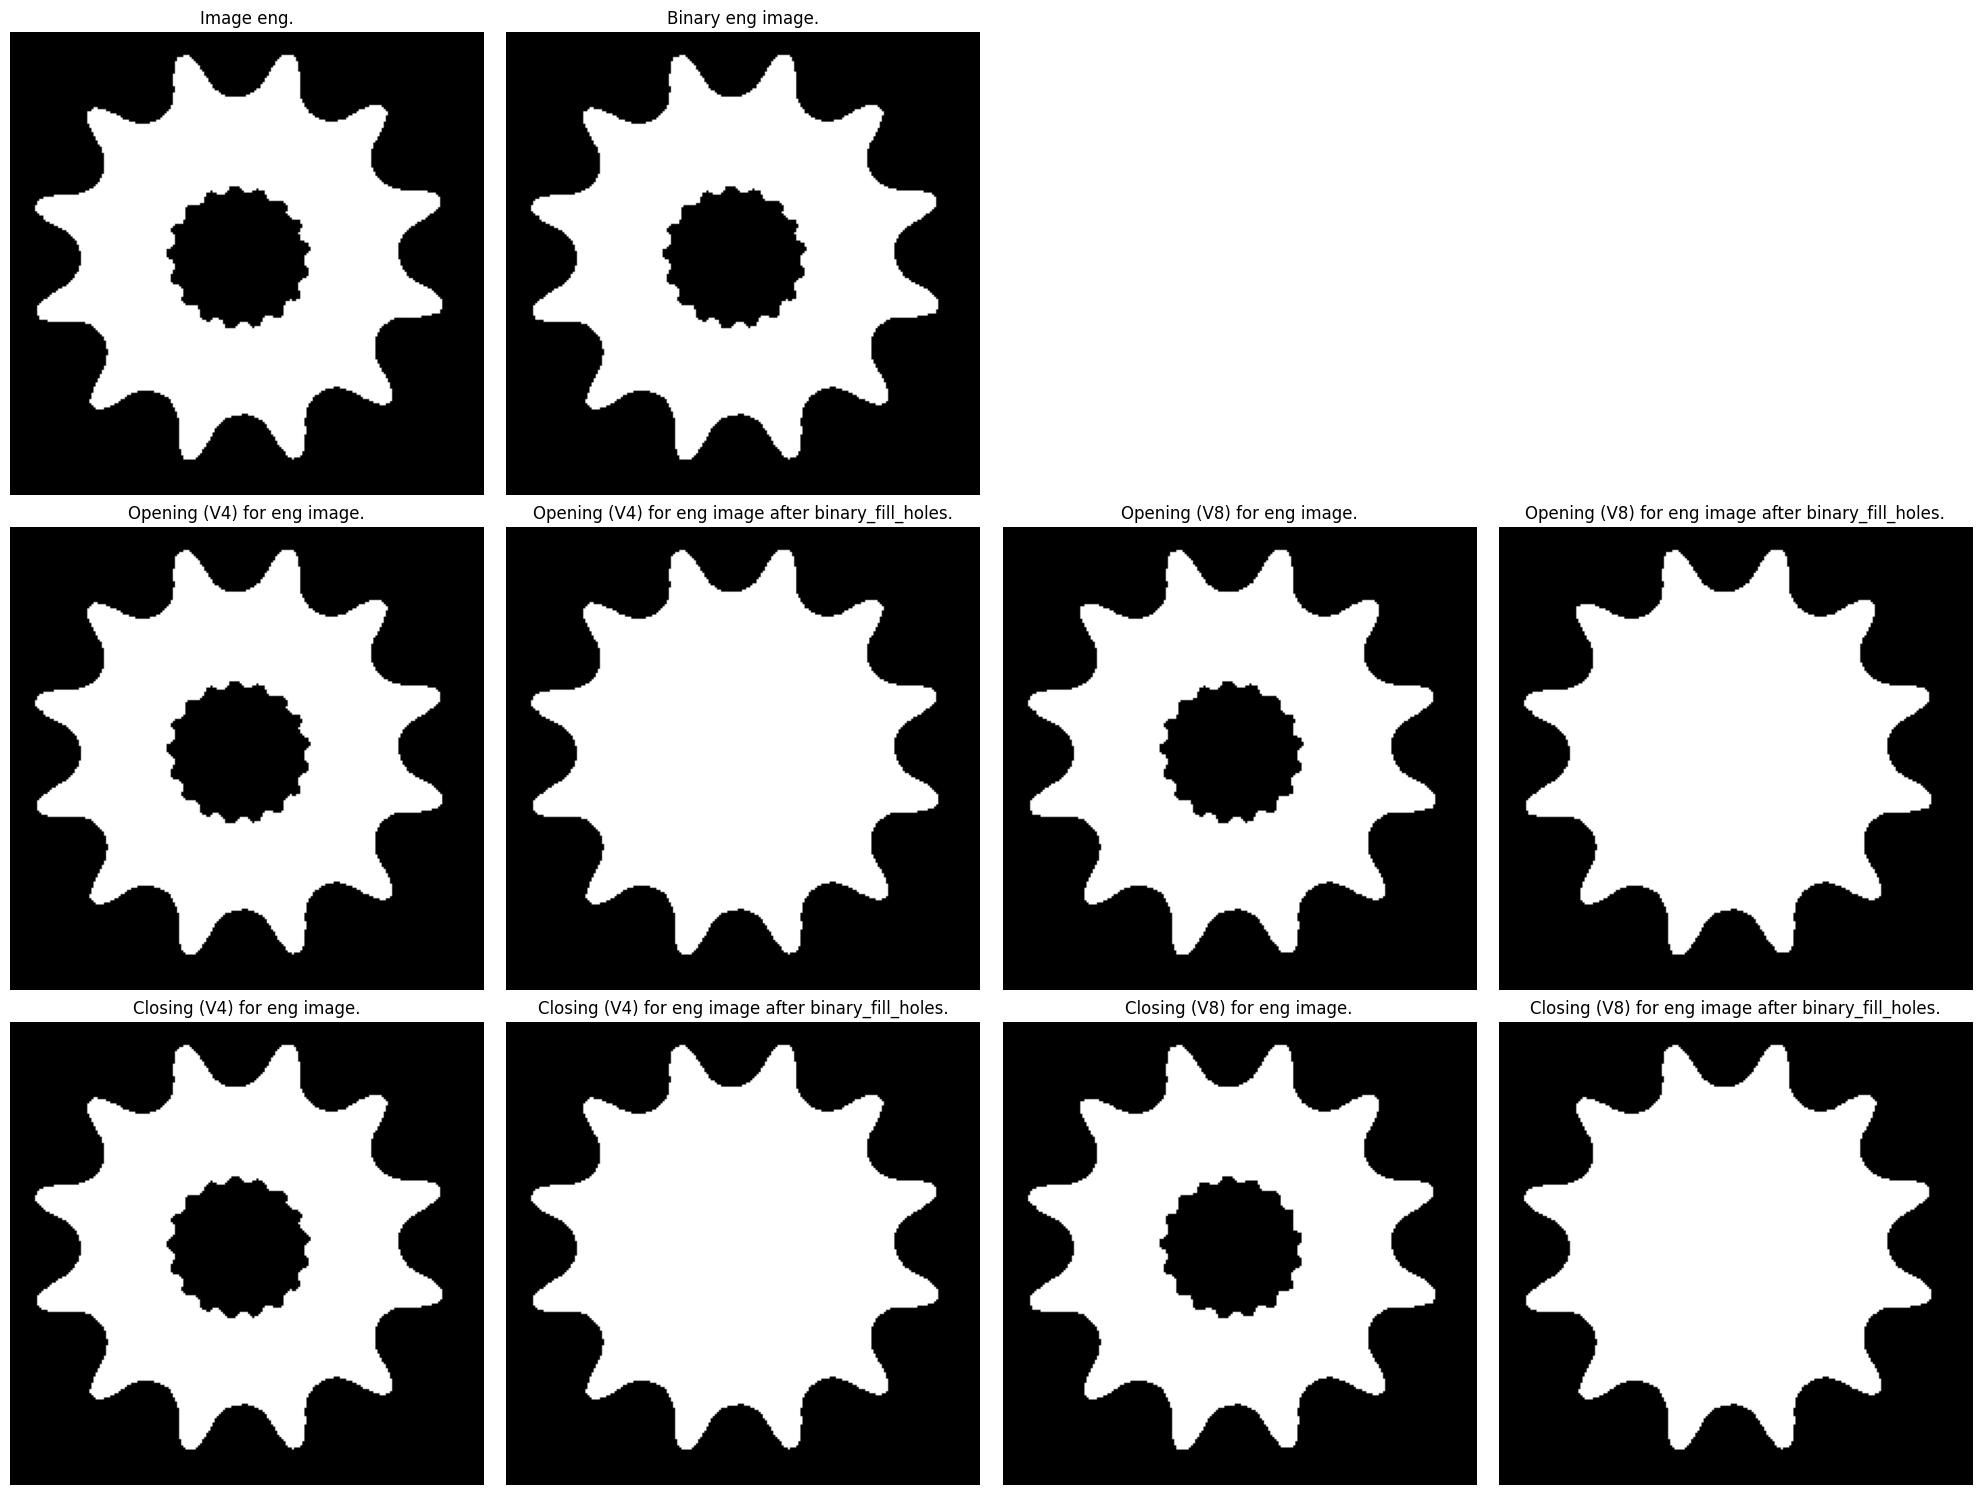

In [23]:
#Opening: removes noise.
#This operation is the same as Erosion + Dilation.
opened4_eng = cv2.morphologyEx(binary_image_eng, cv2.MORPH_OPEN, struct_el2_v4) #(V4)
opened8_eng = cv2.morphologyEx(binary_image_eng, cv2.MORPH_OPEN, struct_el2_v8) #(V8)

#Closing: closes the gaps.
#This operation is the same as Dilation + Erosion.
closed4_eng = cv2.morphologyEx(opened4_eng, cv2.MORPH_CLOSE, struct_el2_v4)
closed8_eng = cv2.morphologyEx(opened8_eng, cv2.MORPH_CLOSE, struct_el2_v8)

#Filling the gaps
opened4_eng_post = binary_fill_holes(opened4_eng).astype(np.uint8) * 255
opened8_eng_post = binary_fill_holes(opened8_eng).astype(np.uint8) * 255
closed4_eng_post = binary_fill_holes(closed4_eng).astype(np.uint8) * 255
closed8_eng_post = binary_fill_holes(closed4_eng).astype(np.uint8) * 255

#Creating the grid for the graphs
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(3, 4, figure=fig)

#First row with two columns
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#Second row with four columns
ax3 = fig.add_subplot(gs[1, 0])  
ax4 = fig.add_subplot(gs[1, 1])  
ax5 = fig.add_subplot(gs[1, 2])  
ax6 = fig.add_subplot(gs[1, 3])

#Third row with four columns
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[2, 3])

#Plots
ax1.imshow(image_eng, cmap='gray', norm=NoNorm())
ax1.set_title("Image eng.")
ax1.axis('off')

ax2.imshow(binary_image_eng, cmap='gray')
ax2.set_title("Binary eng image.")
ax2.axis('off')

ax3.imshow(opened4_eng, cmap='gray')
ax3.set_title("Opening (V4) for eng image.")
ax3.axis('off')

ax4.imshow(opened4_eng_post, cmap='gray')
ax4.set_title("Opening (V4) for eng image after binary_fill_holes.")
ax4.axis('off')

ax5.imshow(opened8_eng, cmap='gray')
ax5.set_title("Opening (V8) for eng image.")
ax5.axis('off')

ax6.imshow(opened8_eng_post, cmap='gray')
ax6.set_title("Opening (V8) for eng image after binary_fill_holes.")
ax6.axis('off')

ax7.imshow(closed4_eng, cmap='gray')
ax7.set_title("Closing (V4) for eng image.")
ax7.axis('off')

ax8.imshow(closed4_eng_post, cmap='gray')
ax8.set_title("Closing (V4) for eng image after binary_fill_holes.")
ax8.axis('off')

ax9.imshow(closed8_eng, cmap='gray')
ax9.set_title("Closing (V8) for eng image.")
ax9.axis('off')

ax10.imshow(closed8_eng_post, cmap='gray')
ax10.set_title("Closing (V8) for eng image after binary_fill_holes.")
ax10.axis('off')

plt.tight_layout()
plt.show()

In [14]:
#Load the image eng2
image_eng2 = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 4 - IP\\IP4_v2 1\\IP4_v2\\eng2.png").convert("L")
#To array
image_array_eng2 = np.array(image_eng2)

#Binarization
binary_image_eng2, otsu_threshold_eng2 = otsu_method(image_array_eng2)

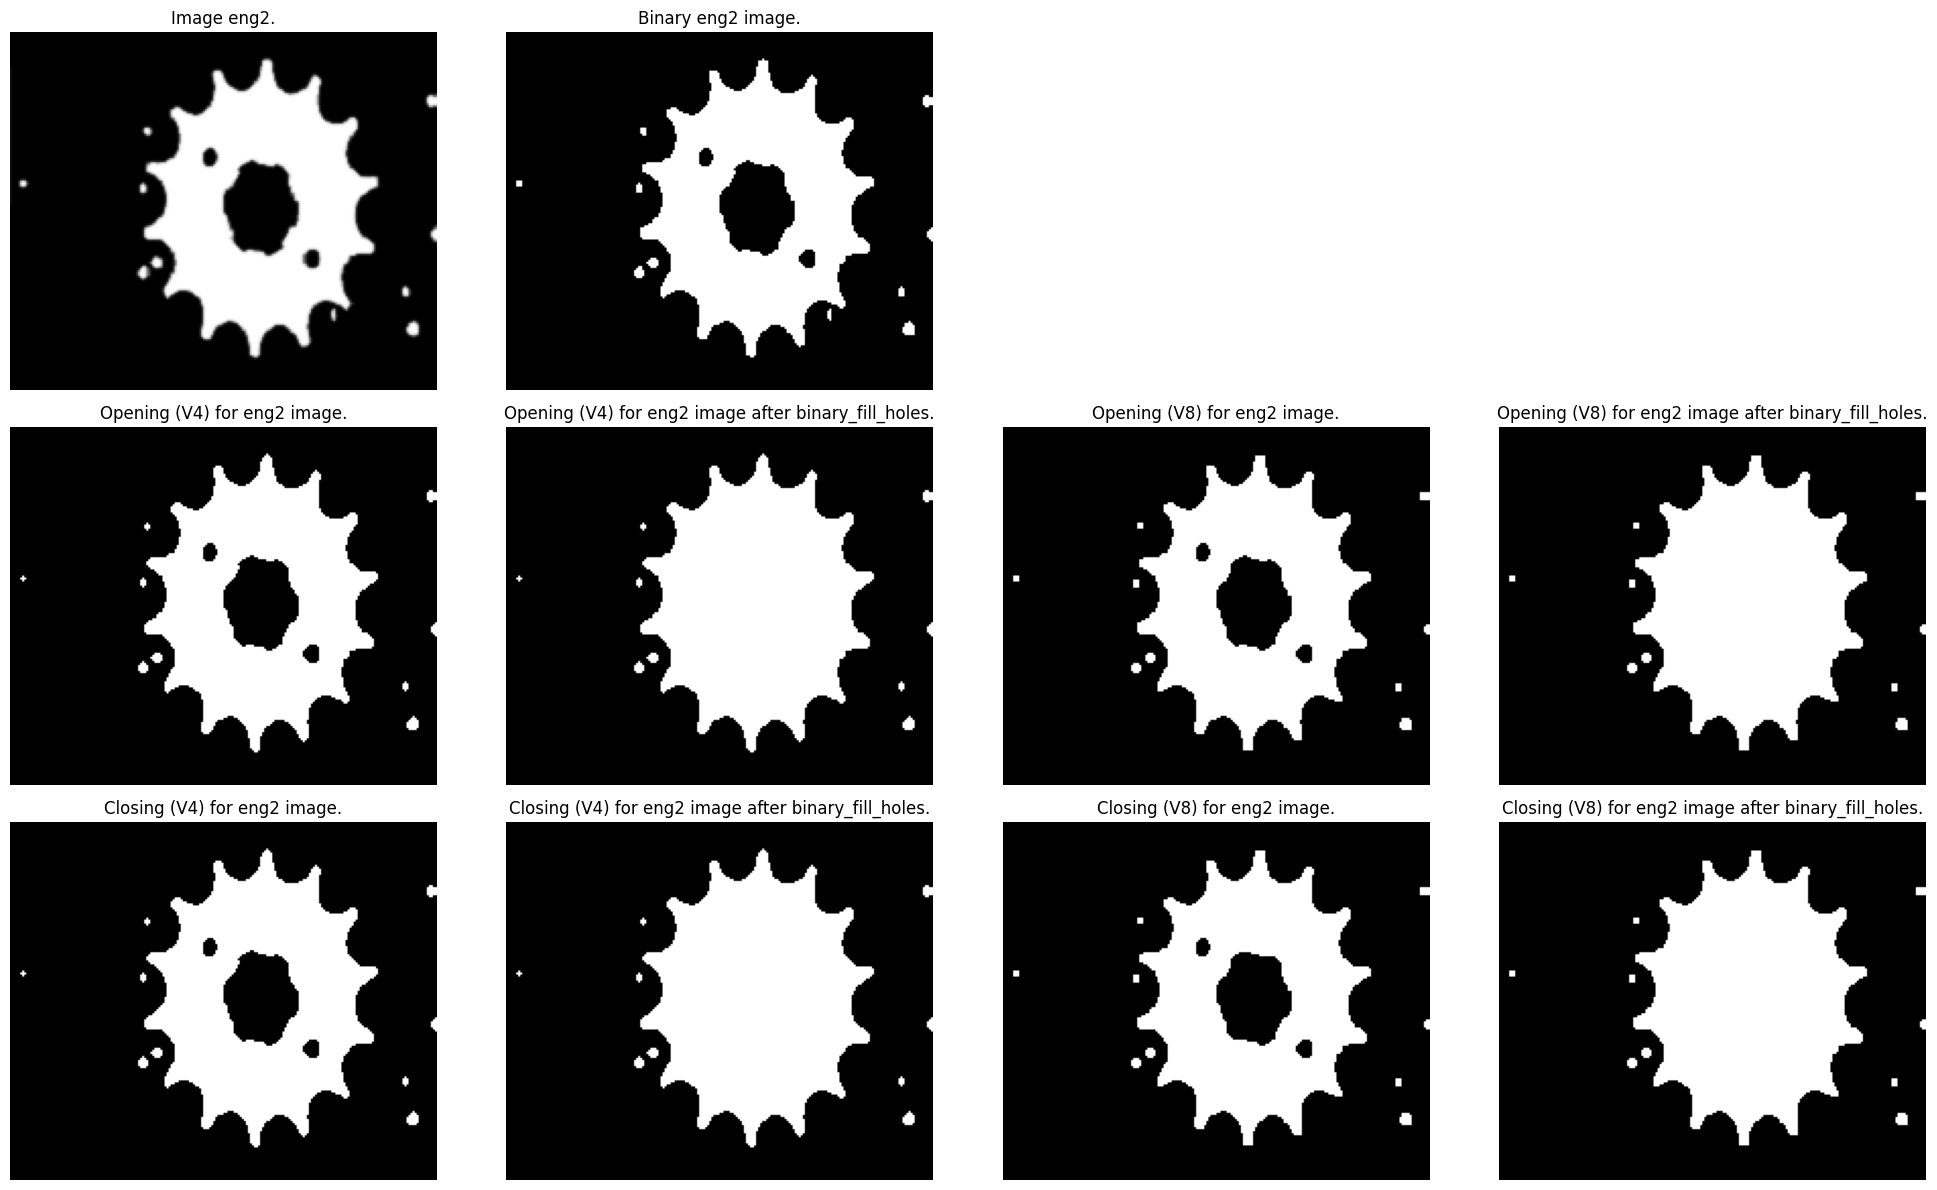

In [25]:
#Opening
opened4_eng2 = cv2.morphologyEx(binary_image_eng2, cv2.MORPH_OPEN, struct_el2_v4) #(V4)
opened8_eng2 = cv2.morphologyEx(binary_image_eng2, cv2.MORPH_OPEN, struct_el2_v8) #(V8)

#Closing
closed4_eng2 = cv2.morphologyEx(opened4_eng2, cv2.MORPH_CLOSE, struct_el2_v4)
closed8_eng2 = cv2.morphologyEx(opened8_eng2, cv2.MORPH_CLOSE, struct_el2_v8)

#Filling the gaps
opened4_eng2_post = binary_fill_holes(opened4_eng2).astype(np.uint8) * 255
opened8_eng2_post = binary_fill_holes(opened8_eng2).astype(np.uint8) * 255
closed4_eng2_post = binary_fill_holes(closed4_eng2).astype(np.uint8) * 255
closed8_eng2_post = binary_fill_holes(closed8_eng2).astype(np.uint8) * 255

#Creating the grid for the graphs
fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 4, figure=fig)

#First row with two columns
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#Second row with four columns
ax3 = fig.add_subplot(gs[1, 0])  
ax4 = fig.add_subplot(gs[1, 1])  
ax5 = fig.add_subplot(gs[1, 2])  
ax6 = fig.add_subplot(gs[1, 3])

#Third row with four columns
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[2, 3])

#Plots
ax1.imshow(image_eng2, cmap='gray', norm=NoNorm())
ax1.set_title("Image eng2.")
ax1.axis('off')

ax2.imshow(binary_image_eng2, cmap='gray')
ax2.set_title("Binary eng2 image.")
ax2.axis('off')

ax3.imshow(opened4_eng2, cmap='gray')
ax3.set_title("Opening (V4) for eng2 image.")
ax3.axis('off')

ax4.imshow(opened4_eng2_post, cmap='gray')
ax4.set_title("Opening (V4) for eng2 image after binary_fill_holes.")
ax4.axis('off')

ax5.imshow(opened8_eng2, cmap='gray')
ax5.set_title("Opening (V8) for eng2 image.")
ax5.axis('off')

ax6.imshow(opened8_eng2_post, cmap='gray')
ax6.set_title("Opening (V8) for eng2 image after binary_fill_holes.")
ax6.axis('off')

ax7.imshow(closed4_eng2, cmap='gray')
ax7.set_title("Closing (V4) for eng2 image.")
ax7.axis('off')

ax8.imshow(closed4_eng2_post, cmap='gray')
ax8.set_title("Closing (V4) for eng2 image after binary_fill_holes.")
ax8.axis('off')

ax9.imshow(closed8_eng2, cmap='gray')
ax9.set_title("Closing (V8) for eng2 image.")
ax9.axis('off')

ax10.imshow(closed8_eng2_post, cmap='gray')
ax10.set_title("Closing (V8) for eng2 image after binary_fill_holes.")
ax10.axis('off')

plt.tight_layout()
plt.show()

##### 1.4. Top-hat use 
##### Try to automatic threshold the image ‘I12’. Before this step, apply the top-hat transformation white_tophat. Try it using a disk structuring element of radius 40.

In [16]:
#Load the image I12
image_I12 = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 4 - IP\\IP4_v2 1\\IP4_v2\\I12.bmp").convert("L")
#To array
image_array_I12 = np.array(image_I12)

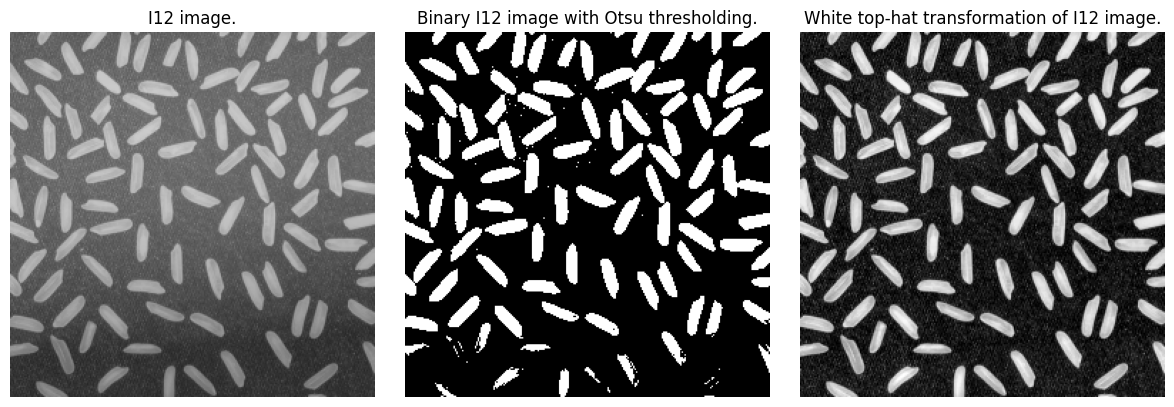

In [17]:
from skimage.morphology import disk, white_tophat

#Binarization using Otsu
binary_image_I12, otsu_threshold_I12 = otsu_method(image_array_I12)

#Application of white top-hat transform
radius = 40
struct_el_disk = disk(radius)  #disk structuring element
tophat_image_I12 = white_tophat(image_array_I12, footprint=struct_el_disk)

#Plot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

#Original image
ax[0].imshow(image_array_I12, cmap='gray', norm=NoNorm())
ax[0].set_title("I12 image.")
ax[0].axis('off')

#Otsu binarization
ax[1].imshow(binary_image_I12, cmap='gray')
ax[1].set_title("Binary I12 image with Otsu thresholding.")
ax[1].axis('off')

#Top-hat image
ax[2].imshow(tophat_image_I12, cmap='gray')
ax[2].set_title("White top-hat transformation of I12 image.")
ax[2].axis('off')

plt.tight_layout()
plt.show()

## References
- https://www.youtube.com/watch?v=WQK_oOWW5Zo&t=485s